# Spotify Music Recommendation System

LOAN DEFAULT PREDICTION MODEL PROJECT DOCUMENTATION

GROUP NUMBER: 8

ACTIVE  GROUP MEMBERS 

NAME    EMAIL ADDRESS

Umar Muhammed Abubakar	Aniekanetimudo@gmail.com

Aniekan Etim Udo	Aniekanetimudo@gmail.com

Ajevwarue Theophilus 	theolove1996@gmail.com


Import Libraries

In [1]:
import numpy as np # load numpy library
import pandas as pd # load pandas library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv('spotify_millsongdata_Recommendation.csv')

Inspect the First Few Rows

In [3]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


Check dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


Check the Dimensions of the Dataset

In [5]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 57650
Number of columns: 4


Check for Missing Values

In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
artist    0
song      0
link      0
text      0
dtype: int64


 Check for duplicate rows

In [7]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicate_rows)


Number of duplicate rows: 0


Check for null values

In [8]:
df.isna().sum()

artist    0
song      0
link      0
text      0
dtype: int64

 # text analysis

1. Text Preprocessing

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (run this line only once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply text preprocessing to the 'text' column
df['clean_text'] = df['text'].apply(preprocess_text)

2. Word Frequency Analysis

In [11]:
# Word Frequency Analysis
# Calculate word frequencies
word_frequencies = df['clean_text'].str.split(expand=True).stack().value_counts()

# Display top 20 most frequent words
print("Top 20 most frequent words:")
print(word_frequencies.head(20))


Top 20 most frequent words:
love     93884
know     72494
like     63567
got      61045
oh       59719
na       48458
one      44700
go       43826
time     43531
get      43443
baby     41725
see      41009
want     39829
never    39378
let      38713
ca       36307
come     36222
say      34241
yeah     34130
way      33280
Name: count, dtype: int64


3. Sentiment Analysis:

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


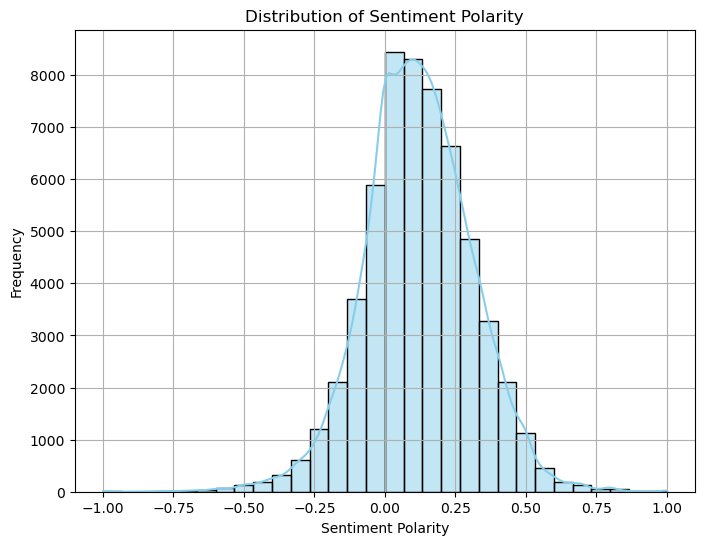

In [12]:
from textblob import TextBlob

# Sentiment Analysis
# Calculate sentiment polarity of each song
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Artist Analysis

1. Number of Songs per Artist:

Top 10 most prolific artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


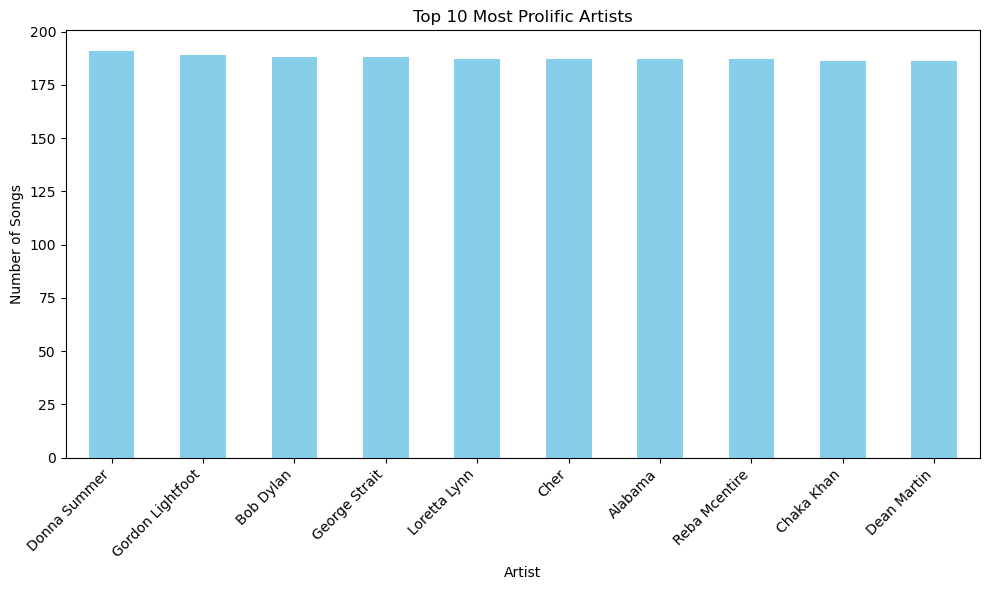

In [13]:
# Count the number of songs per artist
songs_per_artist = df['artist'].value_counts()

# Display the top 10 most prolific artists
print("Top 10 most prolific artists:")
print(songs_per_artist.head(10))

# Plot the distribution of songs per artist
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
songs_per_artist.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prolific Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Donna Summer tops the artist chart with most songs (191). This is closely followed by Gordon Lightfoot that had 189 songs. 

# Word cloud of the most popular artist

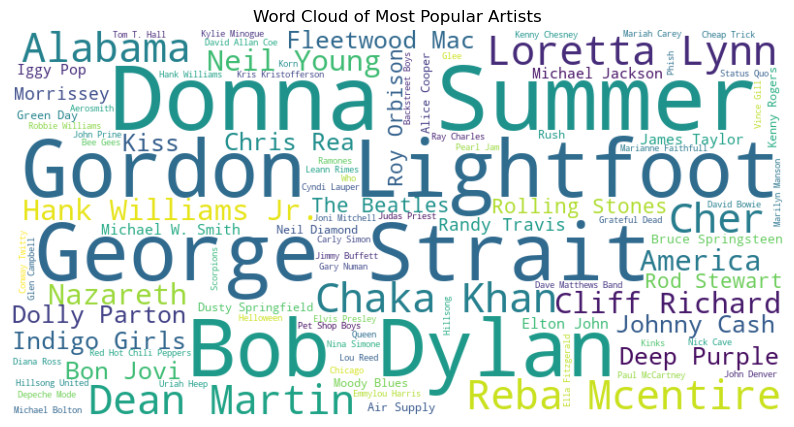

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate the frequency of each artist in the dataset
artist_counts = df['artist'].value_counts()

# Select the top 10 most popular artists (you can adjust the number as needed)
top_artists = artist_counts.head(100)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_artists)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Popular Artists')
plt.axis('off')
plt.show()


# The Model

In [15]:
# Checking our data
df.head()

,artist,song,link,text,clean_text,sentiment
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...,0.447619
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...,0.291667
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...,never know go put lousy rotten show boy tough ...,0.316311
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,making somebody happy question give take learn...,0.373684
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,making somebody happy question give take learn...,0.373684


For our system, we're going to concatenate the artist and the clean_text column together. This is so we can see if artist style through their lyrics influences music choices. 

In [16]:
# Creating a new data frame of required columns
data = df.drop("text", axis = 1)

# Displaying first two items
data.head(2)

,artist,song,link,clean_text,sentiment
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look face wonderful face means something speci...,0.447619
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,take easy please touch gently like summer even...,0.291667


In [17]:
# Concatenating artist and clean_text into a new column called artist_lyrics
data["artist_lyrics"] = data["artist"] + data["clean_text"]

# Displaying first two items
data.head(2)

,artist,song,link,clean_text,sentiment,artist_lyrics
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look face wonderful face means something speci...,0.447619,ABBAlook face wonderful face means something s...
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,take easy please touch gently like summer even...,0.291667,ABBAtake easy please touch gently like summer ...


In [18]:
# Dropping the original clean_text and artist columns
data.drop(columns=["artist", "clean_text"], inplace= True)

# Displaying random two items
data.sample(2)

,song,link,sentiment,artist_lyrics
34655,Amy,/g/green+day/amy_20980817.html,-0.114815,Green Dayheart singing tune eyes singing blues...
2208,Ikaw Lamang,/c/carol+banawa/ikaw+lamang_21065098.html,0.000000,Carol Banawadi ko maintindihan ang nilalaman n...


In [19]:
# Exploring sentiment scores to see if it is normalized
data.sentiment.max()

1.0

In [20]:
data.sentiment.min()

-1.0

As seen the sentiment score has been normalized to reoresent the polarity of sentiment, where -1 is extremely negative, 0 is neutral and 1 is extremely positive. But since we would like to use it as part of machine learning model, we'll scale them to a non-negative as we don't have negative range features in our dataset. 

In [21]:
# Importing MinMaxSCaler
from sklearn.preprocessing import MinMaxScaler

# Creating an object of the scaler
minmax = MinMaxScaler(feature_range= (0, 1))

# Fit and transforming the sentiment column to fall within range of 0 and 1
data["sentiment_score"] = minmax.fit_transform(df[["sentiment"]])

# Checking values
print("Maximum sentiment score:", data.sentiment_score.max())
print("Minimum sentiment score:", data.sentiment_score.min())



Maximum sentiment score: 1.0
Minimum sentiment score: 0.0


The sentiment scores have been normalized.

In [22]:
# Dropping sentiment column
data.drop("sentiment", axis=1, inplace=True)

data.head(2)

,song,link,artist_lyrics,sentiment_score
0,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,ABBAlook face wonderful face means something s...,0.723810
1,"Andante, Andante",/a/abba/andante+andante_20002708.html,ABBAtake easy please touch gently like summer ...,0.645833


Next, we'll vectorise the the artist_lyrics column before combining it with the sentiment_score using TfidfVectorizer. The choice of TfidfVectorizer is because we don't just want to simply counts the number of times each word appears in a document as done by a CountVectorizer. We want to also know the weights of those words. As lyrics often times carries weight. And TfidfVectorizer not only counts the frequency of words but also weighs them according to their importance in the entire corpus of documents. And thus the reason for it's choice. 

In [23]:

data.shape

(57650, 4)

Content-based filtering model using TF-IDF vectorization

In [58]:
# Importing vectorizer and cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extracting artist lyrics
artist_lyrics = data['artist_lyrics']

# Vectorizing using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(artist_lyrics)

# Calculating the average vector (parent vector)
parent_vector = np.asarray(tfidf_matrix.mean(axis=0))

# Calculating cosine similarities
cosine_similarities = cosine_similarity(tfidf_matrix, parent_vector.reshape(1, -1))

In [59]:
# Testing it to return return top 5 most similar artist lyrics
k = 5
top_k_indices = cosine_similarities.argsort(axis=0)[-k:][::-1]
top_k_artist_lyrics = artist_lyrics.iloc[top_k_indices.flatten()]

# Printing the top 5 most similar artist lyrics
for i, lyrics in enumerate(top_k_artist_lyrics):
    print(f"Top-{i+1} Similar Artist Lyrics:\n{lyrics}\n")


Top-1 Similar Artist Lyrics:
Lionel Richiegirl bad thing standing alone looking good baby ca wrong hey baby put arms around set world fire ai never gon na nobody like baby honey lie hey honey put spell tell honey know set free hey little girl know hearts desire come give baby ca deny ya hey hey sayin one time oh give one chance heart mine one time baby ca get enough love oh motown lover girl dreams laugh cry girl look eyes everything oh baby oh baby oh baby puttin spell tell baby know set free ah little girl know heart fire sayin come baby desire hey hey sayin one time oh give one chance heart mine one time ca get enough love ca get enough love whoa oh friends say dreamer takes fool love know feeling time say goodbye find reason give us one try knowing knowing baby gon na hurt ooh ooh oh oh oh oh one time give one chance heart mine one time ca get enough love got feeling deep inside ai nothing hide baby love way love one time oh baby ca see girl need wan na please even though hard love

Voila it worked. We can proceed to linking it to our dataframe using the link column as our unique identifier. 

In [60]:
# Setting the link column as the index
data.set_index('link', inplace=True)

# Converting the cosine similarities to a DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarities, index=data.index, columns=['similarity'])

In [61]:
# Checking 
cosine_similarity_df.head()

,similarity
link,
/a/abba/ahes+my+kind+of+girl_20598417.html,0.189291
/a/abba/andante+andante_20002708.html,0.070937
/a/abba/as+good+as+new_20003033.html,0.266382
/a/abba/bang_20598415.html,0.208660
/a/abba/bang+a+boomerang_20002668.html,0.204597


# Saving data and cosine_similarity_df

In [70]:
df_test = df.copy()

In [72]:
df_test.index = data.index.map(str)

In [74]:
data["artist"] = data.index.map(df_test["artist"])

data.head()

# Dropping sentiment score
data.drop("sentiment_score", axis = 1, inplace = True)

data.head(5)

,song,artist_lyrics,artist
link,,,
/a/abba/ahes+my+kind+of+girl_20598417.html,Ahe's My Kind Of Girl,ABBAlook face wonderful face means something s...,ABBA
/a/abba/andante+andante_20002708.html,"Andante, Andante",ABBAtake easy please touch gently like summer ...,ABBA
/a/abba/as+good+as+new_20003033.html,As Good As New,ABBAnever know go put lousy rotten show boy to...,ABBA
/a/abba/bang_20598415.html,Bang,ABBAmaking somebody happy question give take l...,ABBA
/a/abba/bang+a+boomerang_20002668.html,Bang-A-Boomerang,ABBAmaking somebody happy question give take l...,ABBA


In [77]:
data["lyrics"] = data.index.map(df_test["clean_text"])

data.head()

,song,artist_lyrics,artist,lyrics
link,,,,
/a/abba/ahes+my+kind+of+girl_20598417.html,Ahe's My Kind Of Girl,ABBAlook face wonderful face means something s...,ABBA,look face wonderful face means something speci...
/a/abba/andante+andante_20002708.html,"Andante, Andante",ABBAtake easy please touch gently like summer ...,ABBA,take easy please touch gently like summer even...
/a/abba/as+good+as+new_20003033.html,As Good As New,ABBAnever know go put lousy rotten show boy to...,ABBA,never know go put lousy rotten show boy tough ...
/a/abba/bang_20598415.html,Bang,ABBAmaking somebody happy question give take l...,ABBA,making somebody happy question give take learn...
/a/abba/bang+a+boomerang_20002668.html,Bang-A-Boomerang,ABBAmaking somebody happy question give take l...,ABBA,making somebody happy question give take learn...


In [78]:
# Saving data
import pickle as pk

pk.dump(data, open("spotify_data.pkl", "wb"))

In [76]:
# Saving cosine_similarity_df
pk.dump(cosine_similarity_df, open("similarity_result.pkl", "wb"))